In [5]:
import numpy as np 
import pandas as pd
from sklearn import svm
import altair as alt 
import altair
alt.data_transformers.enable('default', max_rows =  None)

DataTransformerRegistry.enable('default')

In [6]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [8]:
current_working_directory = "/content/drive/MyDrive/IDS Project/" 
#data = pd.read_csv(current_working_directory + 'world_bank_filtered_data.csv')

In [ ]:
data.head()

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.236462,1.432843,0.823502,0.580334,...,0.377979,0.503385,0.58329,0.590508,0.541048,0.50286,0.471874,0.459266,0.437415,0.428017
1,12,Aruba,ABW,CPIA public sector management and institutions...,IQ.CPA.PUBS.XQ,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20,Aruba,ABW,Population living in areas where elevation is ...,EN.POP.EL5M.ZS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23,Aruba,ABW,"Droughts, floods, extreme temperatures (% of p...",EN.CLC.MDAT.ZS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29,Aruba,ABW,Nitrous oxide emissions (thousand metric tons ...,EN.ATM.NOXE.KT.CE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.columns

NameError: ignored

In [ ]:
required_columns = ["Nitrous oxide emissions (thousand metric tons of CO2 equivalent)",
"HFC gas emissions (thousand metric tons of CO2 equivalent)",
"Methane emissions (kt of CO2 equivalent)",
"CO2 emissions (kt)",
"SF6 gas emissions (thousand metric tons of CO2 equivalent)",
"Average precipitation in depth (mm per year)",
"Forest area (sq. km)"]


# Total greenhouse gas emissions (kt of CO2 equivalent) 
# Nitrous oxide emissions (thousand metric tons of CO2 equivalent)
# Methane emissions (kt of CO2 equivalent)
# CO2 emissions (kt)
# Energy use (kg of oil equivalent per capita)
# Average precipitation in depth (mm per year)
# Forest area (sq. km)

In [ ]:
filtered_df = data.loc[data['Indicator Name'].isin(required_columns)]

NameError: ignored

In [ ]:
filtered_df.count().plot.bar(figsize=(15,8))

NameError: ignored

In [ ]:
#filtered_df['Indicator Name'].valuecounts.plot.bar(figsize=(15,8))
#pd.value_counts(filtered_df['Indicator Name']).plot.bar(figsize=(15,8))
pd.value_counts(filtered_df['Indicator Name'])

Nitrous oxide emissions (thousand metric tons of CO2 equivalent)    266
Methane emissions (kt of CO2 equivalent)                            266
Total greenhouse gas emissions (kt of CO2 equivalent)               266
CO2 emissions (kt)                                                  266
Energy use (kg of oil equivalent per capita)                        266
Average precipitation in depth (mm per year)                        266
Forest area (sq. km)                                                266
Name: Indicator Name, dtype: int64

In [ ]:
# number of countries 
print(len(filtered_df['Country Code'].unique()))
filtered_df['Country Code'].unique()

filtered_df.columns


266


Index(['Unnamed: 0', 'Country Name', 'Country Code', 'Indicator Name',
       'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020'],
      dtype='object')

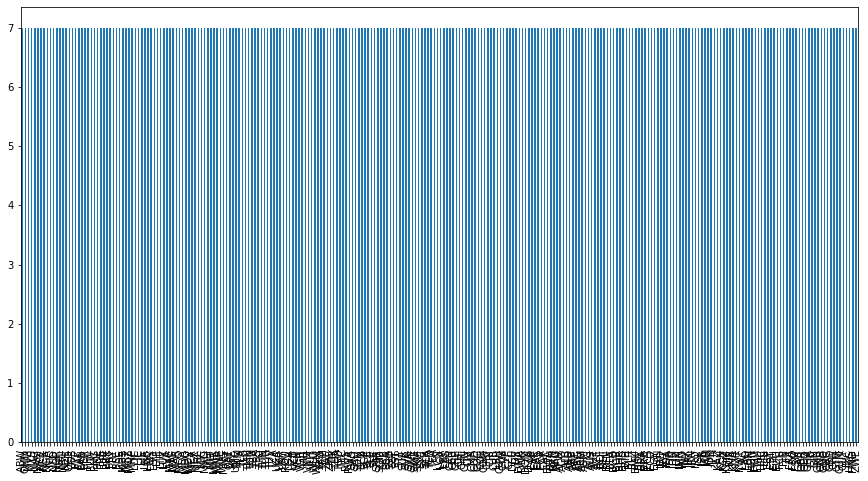

In [ ]:
pd.value_counts(filtered_df['Country Code']).plot.bar(figsize=(15,8))
# to make sure all countries have all columsn basically 

In [ ]:
filtered_df.to_csv("filtered_metrics_world_bank.csv")

In [ ]:
filtered_df.columns

Index(['Unnamed: 0', 'Country Name', 'Country Code', 'Indicator Name',
       'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020'],
      dtype='object')

In [ ]:
# Pivot the data 
metric_data_filt = filtered_df.melt(id_vars=['Country Name', 'Indicator Name', 'Country Code', 'Indicator Code'], var_name='Year', value_name='Metric Data')
patternDel = "(Unnamed*)"
filter = metric_data_filt['Year'].str.contains(patternDel)
metric_data_filt = metric_data_filt[~filter]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


In [ ]:
metric_data_filt.columns

Index(['Country Name', 'Indicator Name', 'Country Code', 'Indicator Code',
       'Year', 'Metric Data'],
      dtype='object')

In [ ]:
pivoted_df = metric_data_filt.pivot(index=['Year', 'Country Name'], columns='Indicator Name', values='Metric Data')


In [ ]:
pivoted_df.head(100)


Indicator Name                    Average precipitation in depth (mm per year)  \
Year Country Name                                                                
1960 Afghanistan                                                           NaN   
     Africa Eastern and Southern                                           NaN   
     Africa Western and Central                                            NaN   
     Albania                                                               NaN   
     Algeria                                                               NaN   
...                                                                        ...   
     Guatemala                                                             NaN   
     Guinea                                                                NaN   
     Guinea-Bissau                                                         NaN   
     Guyana                                                                NaN   
     Haiti                                                                 NaN   

Indicator Name                    CO2 emissions (kt)  \
Year Country Name                                      
1960 Afghanistan                            414.3710   
     Africa Eastern and Southern         118545.9013   
     Africa Western and Central            8760.4630   
     Albania                               2024.1840   
     Algeria                               6160.5600   
...                                              ...   
     Guatemala                             1345.7890   
     Guinea                                 410.7040   
     Guinea-Bissau                           18.3350   
     Guyana                                 660.0600   
     Haiti                                  286.0260   

Indicator Name                    Energy use (kg of oil equivalent per capita)  \
Year Country Name                                                                
1960 Afghanistan                                                           NaN   
     Africa Eastern and Southern                                           NaN   
     Africa Western and Central                                            NaN   
     Albania                                                               NaN   
     Algeria                                                               NaN   
...                                                                        ...   
     Guatemala                                                             NaN   
     Guinea                                                                NaN   
     Guinea-Bissau                                                         NaN   
     Guyana                                                                NaN   
     Haiti                                                                 NaN   

Indicator Name                    Forest area (sq. km)  \
Year Country Name                                        
1960 Afghanistan                                   NaN   
     Africa Eastern and Southern                   NaN   
     Africa Western and Central                    NaN   
     Albania                                       NaN   
     Algeria                                       NaN   
...                                                ...   
     Guatemala                                     NaN   
     Guinea                                        NaN   
     Guinea-Bissau                                 NaN   
     Guyana                                        NaN   
     Haiti                                         NaN   

Indicator Name                    Methane emissions (kt of CO2 equivalent)  \
Year Country Name                                                            
1960 Afghanistan                                                       NaN   
     Africa Eastern and Southern                                       NaN   
     Africa Western and Central                                       

In [ ]:
pivoted_df = pivoted_df.groupby(['Year']).sum()

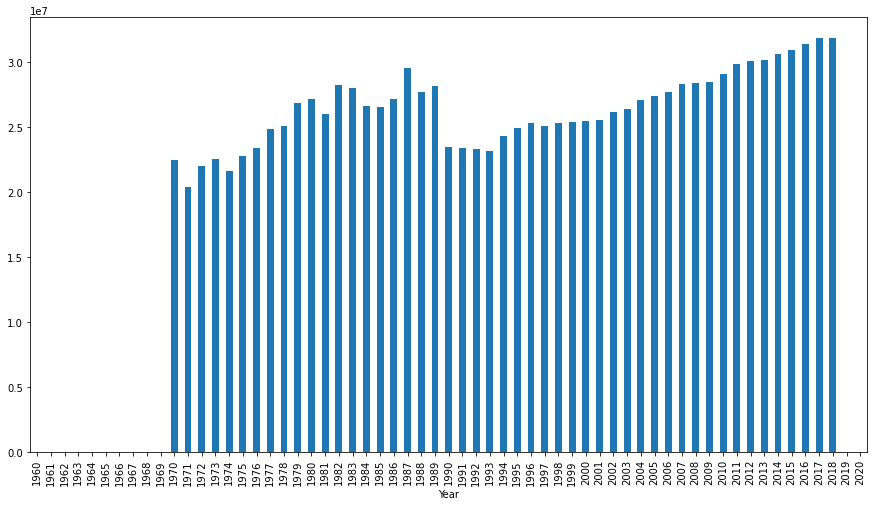

In [ ]:
pivoted_df['Nitrous oxide emissions (thousand metric tons of CO2 equivalent)'].plot.bar(figsize=(15,8))

#### **Prediction Model**

In [ ]:
# Prediction model 

In [16]:
global_temp_file = current_working_directory + "temp.csv" 

In [ ]:
global_temp = pd.read_csv(global_temp_file)

In [ ]:
global_temp.head() 
global_temp = global_temp.rename(columns={"year":"Year", "temp":"Temperature"})

In [ ]:
#pivoted_df = pivoted_df.astype(int)
pivoted_df.reset_index(inplace = True)

In [ ]:
pivoted_df["Year"] = pivoted_df["Year"].astype(int)

In [ ]:
global_temp.dtypes

Year              int64
non_smoothed    float64
Temperature     float64
dtype: object

In [ ]:
joined_df = pivoted_df.set_index("Year").join(global_temp.set_index("Year"), on="Year", how="inner")
joined_df.head()
joined_df.reset_index(inplace=True)

In [ ]:
# impute the forest area values to fill na
forest_df = joined_df[['Year', 'Forest area (sq. km)']]
forest_df_train = forest_df[forest_df['Year'] >= 1990]
forest_df_test = forest_df[forest_df['Year'] < 1990]
display(forest_df_train)
display(forest_df_test)

train_x = forest_df_train['Year'].values
train_y = forest_df_train['Forest area (sq. km)'].values

test_x = forest_df_test['Year'].values
test_y = forest_df_test['Forest area (sq. km)'].values

from sklearn.linear_model import LinearRegression

train_x_np = np.array(train_x)
train_x_np = train_x_np.reshape(-1, 1)

forest_lin_reg = LinearRegression().fit(train_x_np, train_y)
test_x_np = np.array(test_x)
test_x_np = test_x_np.reshape(-1, 1)
pred_y = forest_lin_reg.predict(test_x_np)

forest_area_dict = dict(zip(test_x, pred_y))
forest_area_dict

,Year,Forest area (sq. km)
30,1990,4.429705e+08
31,1991,4.424651e+08
32,1992,4.414449e+08
33,1993,4.402303e+08
34,1994,4.392440e+08
35,1995,4.382578e+08
36,1996,4.372715e+08
37,1997,4.362852e+08
38,1998,4.352990e+08
39,1999,4.343127e+08


,Year,Forest area (sq. km)
0,1960,0.0
1,1961,0.0
2,1962,0.0
3,1963,0.0
4,1964,0.0
5,1965,0.0
6,1966,0.0
7,1967,0.0
8,1968,0.0
9,1969,0.0


{1960: 493171683.9982176,
 1961: 491695952.1144805,
 1962: 490220220.2307439,
 1963: 488744488.3470073,
 1964: 487268756.46327066,
 1965: 485793024.5795336,
 1966: 484317292.69579697,
 1967: 482841560.81206036,
 1968: 481365828.92832375,
 1969: 479890097.04458666,
 1970: 478414365.16085005,
 1971: 476938633.27711344,
 1972: 475462901.3933768,
 1973: 473987169.50963974,
 1974: 472511437.6259031,
 1975: 471035705.7421665,
 1976: 469559973.8584299,
 1977: 468084241.9746928,
 1978: 466608510.0909562,
 1979: 465132778.2072196,
 1980: 463657046.323483,
 1981: 462181314.4397459,
 1982: 460705582.5560093,
 1983: 459229850.6722727,
 1984: 457754118.7885356,
 1985: 456278386.904799,
 1986: 454802655.0210624,
 1987: 453326923.13732576,
 1988: 451851191.2535887,
 1989: 450375459.36985207}

In [ ]:
# update the forst area 

for k,v in forest_area_dict.items():
  joined_df.loc[joined_df["Year"] == k,'Forest area (sq. km)'] = v  

joined_df.head(20)

,Year,Average precipitation in depth (mm per year),CO2 emissions (kt),Energy use (kg of oil equivalent per capita),Forest area (sq. km),Methane emissions (kt of CO2 equivalent),Nitrous oxide emissions (thousand metric tons of CO2 equivalent),Total greenhouse gas emissions (kt of CO2 equivalent),non_smoothed,Temperature
0,1960,0.0,7.702871e+07,73952.288721,4.931717e+08,0.000000e+00,0.000000e+00,0.000000e+00,-0.03,8.62
1,1961,0.0,7.629163e+07,75036.192647,4.916960e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.06,8.60
2,1962,197337.1,7.857732e+07,78158.689988,4.902202e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.03,8.58
3,1963,0.0,8.310598e+07,82336.973040,4.887445e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.05,8.56
4,1964,0.0,8.769422e+07,85689.142536,4.872688e+08,0.000000e+00,0.000000e+00,0.000000e+00,-0.20,8.55
5,1965,0.0,9.268849e+07,89875.760398,4.857930e+08,0.000000e+00,0.000000e+00,0.000000e+00,-0.11,8.54
6,1966,0.0,9.770531e+07,92425.476482,4.843173e+08,0.000000e+00,0.000000e+00,0.000000e+00,-0.06,8.53
7,1967,197337.1,1.008561e+08,95086.090794,4.828416e+08,0.000000e+00,0.000000e+00,0.000000e+00,-0.02,8.54
8,1968,0.0,1.063815e+08,101093.967307,4.813658e+08,0.000000e+00,0.000000e+00,0.000000e+00,-0.08,8.56
9,1969,0.0,1.136589e+08,107050.365940,4.798901e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.05,8.57


In [9]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
joined_df.head(20)
#joined_df.reset_index(inplace = True)
joined_df = joined_df[(joined_df['Year'] >= 1970) & (joined_df['Year'] <= 2015) ]

prepared_df = joined_df[['CO2 emissions (kt)', 'Energy use (kg of oil equivalent per capita)', 'Methane emissions (kt of CO2 equivalent)', 'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)','Total greenhouse gas emissions (kt of CO2 equivalent)']]
#joined_df['Year'].value_counts()
temp_labels = joined_df[['Temperature']]

NameError: ignored

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

lin_reg = LinearRegression()

In [ ]:
# prepare data
scaler = StandardScaler()
prepared_df = scaler.fit_transform(prepared_df)


In [ ]:
lin_reg.fit(prepared_df, temp_labels)

LinearRegression()

In [ ]:
# Testing 
joined_df = pivoted_df.set_index("Year").join(global_temp.set_index("Year"), on="Year", how="inner")
joined_df.reset_index(inplace=True)
joined_df_test = joined_df[(joined_df['Year'] >= 2016) & (joined_df['Year'] <= 2018) ]
test_df = joined_df_test[['CO2 emissions (kt)', 'Energy use (kg of oil equivalent per capita)', 'Methane emissions (kt of CO2 equivalent)', 'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)','Total greenhouse gas emissions (kt of CO2 equivalent)']]

temp_labels_test = joined_df_test[['Temperature']]
test_df = scaler.fit_transform(test_df)


print("Predictions:", lin_reg.predict(test_df))
print("Labels:", display(temp_labels_test))

Predictions: [[8.65376491]
 [9.01569294]
 [9.20141172]]


,Temperature
56,9.47
57,9.50
58,9.51


Labels: None


In [ ]:
# ALTAIR LINE CHART 

In [10]:

import altair as alt

proj_temp_file = current_working_directory + "projected_temp.csv" 
proj_temp = pd.read_csv(proj_temp_file)  
proj_temp = proj_temp.rename(columns={"SSP1-1.9":"SSP1","SSP1-2.6":"SSP2", "SSP2-4.5":"SSP3", "SSP3-7.0":"SSP4", "SSP5-8.5":"SSP5"})
print(current_working_directory) 

/content/drive/MyDrive/IDS Project/


In [11]:
# proj_temp.columns 
# for i in range(10):
#   proj_temp = proj_temp.append(proj_temp.loc[[i] * 1].assign(**{'area': 8.1}), ignore_index=True)
# for i in range(10):
#   proj_temp = proj_temp.append(proj_temp.loc[[i] * 1].assign(**{'area': 10.1}), ignore_index=True)
# #for i in range(10):
# #  proj_temp = proj_temp.append(proj_temp.loc[[i] * 1], ignore_index=True)



In [ ]:
#joined_df_area.columns 
# for i in range(10):
#   joined_df_area = joined_df_area.append(joined_df_area.loc[[i] * 1].assign(**{'area': 15}), ignore_index=True)

In [12]:
proj_temp.head(20)

,Category,"Hist. Ref. Per., 1995-2014",Historical 10-90th Percentile Range (low),Historical 10-90th Percentile Range (high),SSP1,SSP1-1.9 10-90th Percentile Range (low),SSP1-1.9 10-90th Percentile Range (high),SSP2,SSP1-2.6 10-90th Percentile Range (low),SSP1-2.6 10-90th Percentile Range (high),SSP3,SSP2-4.5 10-90th Percentile Range (low),SSP2-4.5 10-90th Percentile Range (high),SSP4,SSP3-7.0 10-90th Percentile Range (low),SSP3-7.0 10-90th Percentile Range (high),SSP5,SSP5-8.5 10-90th Percentile Range (low),SSP5-8.5 10-90th Percentile Range (high)
0,1995,8.65,7.50,9.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1996,8.76,7.61,9.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1997,8.86,7.72,9.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1998,8.96,7.83,10.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1999,9.05,7.93,10.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,9.14,8.01,10.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2001,9.21,8.08,10.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2002,9.26,8.14,10.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2003,9.30,8.17,10.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2004,9.33,8.20,10.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#proj_temp = proj_temp[(proj_temp['Category'] >= 1995) & (proj_temp['Category'] <= 2014) ]
proj_temp.dtypes
proj_temp = proj_temp.rename(columns={'Hist. Ref. Per., 1995-2014': 'hist_temp'})

In [14]:
proj_temp[proj_temp['hist_temp']==8.76]
display(proj_temp)

,Category,hist_temp,Historical 10-90th Percentile Range (low),Historical 10-90th Percentile Range (high),SSP1,SSP1-1.9 10-90th Percentile Range (low),SSP1-1.9 10-90th Percentile Range (high),SSP2,SSP1-2.6 10-90th Percentile Range (low),SSP1-2.6 10-90th Percentile Range (high),SSP3,SSP2-4.5 10-90th Percentile Range (low),SSP2-4.5 10-90th Percentile Range (high),SSP4,SSP3-7.0 10-90th Percentile Range (low),SSP3-7.0 10-90th Percentile Range (high),SSP5,SSP5-8.5 10-90th Percentile Range (low),SSP5-8.5 10-90th Percentile Range (high)
0,1995,8.65,7.50,9.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1996,8.76,7.61,9.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1997,8.86,7.72,9.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1998,8.96,7.83,10.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1999,9.05,7.93,10.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,2096,NaN,NaN,NaN,10.37,9.04,11.64,10.99,9.57,12.52,12.46,10.94,14.12,14.03,12.43,15.73,15.25,13.20,17.88
102,2097,NaN,NaN,NaN,10.36,8.98,11.65,10.99,9.53,12.53,12.47,10.94,14.13,14.07,12.45,15.82,15.36,13.25,17.95
103,2098,NaN,NaN,NaN,10.34,8.89,11.68,10.98,9.48,12.55,12.49,10.95,14.14,14.11,12.45,15.91,15.48,13.30,18.01
104,2099,NaN,NaN,NaN,10.33,8.78,11.71,10.97,9.43,12.56,12.50,10.96,14.14,14.14,12.46,16.01,15.62,13.35,18.06


In [17]:
# create data structure 
global_temp = pd.read_csv(global_temp_file)

sheets_file_name = current_working_directory + 'ice_sheets.csv'
sheets_df = pd.read_csv(sheets_file_name, sep='\t')
# sheets_df = sheets_df[['year', 'extent']]
# sheets_df = sheets_df.rename(columns={'extent': 'area'})
# using area instead of extent 
sheets_df = sheets_df[['year', 'area']]
# sheets_df = sheets_df.rename(columns={'extent': 'area'})
#display(sheets_df)

joined_df_area = global_temp.set_index('year').join(sheets_df.set_index('year'), how='inner', on='year')
ice_sheet_df = pd.DataFrame(columns=['Category','hist_temp','area','SSP1','SSP2','SSP3','SSP4', 'SSP5'])
MAX_AREA = max(sheets_df['area']) 
print(MAX_AREA)
def get_x_and_y(df, xcol, ycol):
    x = np.array(df[xcol].values)
    y = np.array(df[ycol].values)
    return (x.reshape(-1, 1), y)

def get_x(df, xcol):
    x = np.array(df[xcol].values)
    return x.reshape(-1, 1)

def train_reg_model(train_x, train_y):
    lin_reg_model = LinearRegression().fit(train_x, train_y)
    return lin_reg_model

def train_svc_model(train_x, train_y):
  svc = svm.SVR(kernel='linear')
  lin_reg_model = svc.fit(train_x, train_y)
  return lin_reg_model

def predict_ice_sheet(lin_reg_model, test_x):
  return lin_reg_model.predict(test_x)

train_x, train_y = get_x_and_y(joined_df_area, 'temp', 'area')



lin_reg_model = train_svc_model(train_x, train_y)
#lin_reg_model = 


5.64


In [37]:
proj_temp.rename(columns={"hist_temp": "SSP0"}, inplace=True)

In [47]:
# filter the data 
proj_temp_test = proj_temp[(proj_temp['Category'] >= 2014) & (proj_temp['Category'] <= 2050)]
proj_temp_hist = proj_temp[(proj_temp['Category'] <= 2014) & (proj_temp['Category'] >= 1995)]

proj_temp_with_area = pd.DataFrame()
ssp_names_list = ["SSP" + str(x) for x in range(0, 6)]
#sp_names_list.append("hist_temp")

proj_temp_hist

for column_name in ssp_names_list:
  print("adding column: ", column_name)
  if(column_name == "SSP0"):
    print("cols: ", proj_temp_hist.columns)
    test_x = get_x(proj_temp_hist, column_name)
  else:
    test_x = get_x(proj_temp_test, column_name)

  #display(test_x)
  pred_list = predict_ice_sheet(lin_reg_model, test_x)
  print("predictions: ", pred_list)
  temp_list = []
  # create lists
  # for ind,i in enumerate(proj_temp_test.iterrows()): 
  #   temp_list.append(i[1][column_name])

  year_list=[]
  # create lists
  if(column_name == "SSP0"):
    for ind,i in enumerate(proj_temp_hist.iterrows()): 
      temp_list.append(i[1][column_name])
      year_list.append(i[1]['Category'])
  else:
    for ind,i in enumerate(proj_temp_test.iterrows()): 
      temp_list.append(i[1][column_name])
      year_list.append(i[1]['Category'])

  # df = df.append(pd.DataFrame(list, columns=['col1','col2']),ignore_index=True)
  merged_list = [] 
  ssp_index = {}
  for ind in range(len(pred_list)):
    # add only if non-zero
    if (pred_list[ind] < 0):
      tmp_list = [int(year_list[ind]), temp_list[ind], 0, column_name, "ice"] 
      merged_list.append(tmp_list)

      # add MAX-temp as another row
      tmp_list = [int(year_list[ind]), temp_list[ind], MAX_AREA, column_name, "water"] 
      merged_list.append(tmp_list)
    else:
      tmp_list = [int(year_list[ind]), temp_list[ind], pred_list[ind], column_name, "ice"] 
      merged_list.append(tmp_list)
      
      # add MAX-temp as another row
      tmp_list = [int(year_list[ind]), temp_list[ind], MAX_AREA - pred_list[ind], column_name, "water"] 
      merged_list.append(tmp_list)

  # merged_list
  # column_name

  # # append the new entries 
  proj_temp_with_area = proj_temp_with_area.append(pd.DataFrame(merged_list, columns=['Category', 'SSP', 'area', 'SSPType', 'ssp_type']),ignore_index=True)

#proj_temp_with_area = proj_temp_with_area.drop_duplicates()

# append the two entries 
# pred_dict = {} 
# for ind,i in enumerate(proj_temp_test.iterrows()):
#   pred_dict[i[1]["hist_temp"]] = pred_list[ind]

#proj_temp['area'] = proj_temp['hist_temp'].map(pred_dict) 

# add another layer 

# for ind,i in enumerate(proj_temp_test.iterrows()):
#   pred_dict[i[1]["hist_temp"]] = 8 - pred_list[ind]
#   proj_temp = proj_temp.append(proj_temp.loc[[ind] * 1].assign(**{'area':  8 - pred_list[ind]}), ignore_index=True) 

adding column:  SSP0
cols:  Index(['Category', 'SSP0', 'Historical 10-90th Percentile Range (low)',
       'Historical 10-90th Percentile Range (high)', 'SSP1',
       'SSP1-1.9 10-90th Percentile Range (low)',
       'SSP1-1.9 10-90th Percentile Range (high)', 'SSP2',
       'SSP1-2.6 10-90th Percentile Range (low)',
       'SSP1-2.6 10-90th Percentile Range (high)', 'SSP3',
       'SSP2-4.5 10-90th Percentile Range (low)',
       'SSP2-4.5 10-90th Percentile Range (high)', 'SSP4',
       'SSP3-7.0 10-90th Percentile Range (low)',
       'SSP3-7.0 10-90th Percentile Range (high)', 'SSP5',
       'SSP5-8.5 10-90th Percentile Range (low)',
       'SSP5-8.5 10-90th Percentile Range (high)'],
      dtype='object')
predictions:  [4.95170247 4.74898667 4.56469958 4.3804125  4.21455412 4.04869574
 3.91969478 3.82755124 3.7538364  3.69855027 3.64326415 3.60640673
 3.5511206  3.51426319 3.44054835 3.36683352 3.27468997 3.18254643
 3.09040289 2.99825934]
adding column:  SSP1
predictions:  [2.99

In [ ]:
# joined_df_area = joined_df_area.rename(columns={"year":"Category"})
# joined_df_area.head(5)


In [ ]:
# proj_temp_with_area_relevant_columns = proj_temp_with_area[['SSP1', 'hist_temp', 'area']]
# # def create_chart(country_data, metric_name):
# #   base1 = alt.Chart(proj_temp).encode(
# #       alt.X('Category', axis=alt.Axis(title=None))
# #   )

# #   area = base1.mark_area(opacity=0.3, color='#57A44C').encode(
# #       alt.Y('hist_temp:Q',
# #       axis=alt.Axis(title=metric_name, titleColor='#57A44C')),
# #   )#.transform_filter(picked)

# #   line = base1.mark_line(stroke='#5276A7', point = True).encode(
# #       alt.Y('mean(AbsoluteTemperature)',
# #             axis=alt.Axis(title='Temperature', titleColor='#5276A7'),
# #             scale=alt.Scale(zero=False)
# #       ),
# #       tooltip = 'mean(AbsoluteTemperature)'
# #   ).transform_filter(picked)


# #   joined = alt.layer(area, line).resolve_scale(
# #       y = 'independent'
# #   )
# #   return joined

# proj_cols = ["SSP1","SSP2","SSP3", "SSP4", "SSP5"]
# base = alt.Chart(proj_temp_with_area).encode(
#     alt.X('Category:Q'),
# )
# range_ = ['white', 'lightblue']
# #selector = alt.selection_single(fields=['hist_temp'], on='mouseover', empty='none')
# selector2 = alt.selection_single(fields=['hist_temp'],  on='mouseover', empty='none')

# # # mark old temp 
# # line = base.mark_line(color='blue', point=True).encode(
# #     #alt.Color('Category', scale=alt.Scale(scheme='pastel1')),
# #     alt.Y('hist_temp:Q', scale=alt.Scale(zero=False)),
# #     tooltip='hist_temp',
# #     strokeWidth=alt.value(5),
# # ).properties(width=700, height=400).add_selection(selector)

# # mark 1 
# # line2 = base.mark_line(color='red').encode(
# #     #alt.Color('SSP', scale=alt.Scale(scheme='pastel1')),
# #     alt.Y('SSP1:Q', scale=alt.Scale(zero=False)),
# #     tooltip='SSP1',
# # ).add_selection(selector2)

# # # mark 2 
# # line3 = base.mark_line(color='darkolivegreen').encode(
# #     #alt.Color('SSP', scale=alt.Scale(scheme='pastel1')),
# #     alt.Y('SSP2:Q', scale=alt.Scale(zero=False)),
# #     tooltip='SSP2',
# # )
# # # mark 3 
# # line4 = base.mark_line(color='sienna').encode(
# #     #alt.Color('SSP', scale=alt.Scale(scheme='pastel1')),
# #     alt.Y('SSP3:Q', scale=alt.Scale(zero=False)),
# #     tooltip='SSP3',
# # )


# # # mark 4 
# # line5 = base.mark_line(color='orchid').encode(
# #     #alt.Color('SSP', scale=alt.Scale(scheme='pastel1')),
# #     alt.Y('SSP4:Q', scale=alt.Scale(zero=False)),
# #     tooltip='SSP4',
# # )
# # # mark 5 
# # line6 = base.mark_line(color='peachpuff').encode(
# #     #alt.Color('SSP', scale=alt.Scale(scheme='pastel1')),
# #     alt.Y('SSP5:Q', scale=alt.Scale(zero=False)),
# #     tooltip='SSP5',
# # )

# import numpy as np
# import altair as alt

# x1 = 9
# display(proj_temp_with_area)
# pie = alt.Chart(proj_temp_with_area).mark_arc(color="silver").encode(
#     theta = alt.Theta(field="area", type="quantitative") ,
#     color = alt.Color(field="area", type="quantitative", scale=alt.Scale(range=range_)),
#     radius = alt.datum(100, scale=None), 
# ).transform_filter(
#      selector2
# )

# alt.hconcat( line2, pie)


In [ ]:
# display(proj_temp)

In [58]:


# proj_temp_with_area_relevant_columns = proj_temp_with_area[['SSP2', 'Category', 'area']].copy()
# proj_temp_with_area_relevant_columns = proj_temp_with_area_relevant_columns.rename(columns={'Category': 'Year'}).reset_index().drop(columns=['index'], axis=1)
# proj_temp_with_area_relevant_columns = proj_temp_with_area_relevant_columns[proj_temp_with_area_relevant_columns['Year'] >=2015]
# proj_temp_without_year = proj_temp_with_area.drop(columns=['Category'], axis = 1)
# print(proj_temp_with_area_relevant_columns.head(1))
# proj_temp_without_year
# proj_temp_with_area_relevant_columns


# Remove all the non zero values 
#proj_temp_with_area['area'] = proj_temp_with_area['area'].apply(lambda x : x if x > 0 else 0)
display(proj_temp_with_area) 


,Category,SSP,area,SSPType,ssp_type
0,1995,8.65,4.951702,SSP0,ice
1,1995,8.65,0.688298,SSP0,water
2,1996,8.76,4.748987,SSP0,ice
3,1996,8.76,0.891013,SSP0,water
4,1997,8.86,4.564700,SSP0,ice
...,...,...,...,...,...
405,2048,11.69,5.640000,SSP5,water
406,2049,11.74,0.000000,SSP5,ice
407,2049,11.74,5.640000,SSP5,water
408,2050,11.78,0.000000,SSP5,ice


In [57]:
proj_temp_with_area.to_csv("ice_area_temp.csv") 

In [ ]:
proj_temp_with_area = pd.read_csv("ice_area_temp.csv")

In [56]:
range_ = [ 'darkgreen', 'lightgreen', 'orange', 'red', 'darkred','blue', 'lightblue', 'skyblue']
#range_ = [ 'silver','skyblue']

proj_new_data = proj_temp_with_area.rename(columns={'Category': 'Year'})
brush = alt.selection_single(fields=['SSP', 'SSPType'], on='click', empty='none')
base = alt.Chart(proj_new_data).encode(
    alt.X('Year:Q'),
)
ssp1_point = base.mark_point().encode(
    alt.Y('SSP:Q', scale=alt.Scale(zero=False)),
    alt.X('Year', scale=alt.Scale(zero=False)),
    alt.Color('SSPType'),
    strokeWidth=alt.value(2),
    tooltip = 'SSP'
).properties(width=700, height=400).add_selection(brush)

ssp1_line = base.mark_line(
     point={
      "filled": True,
    }
).encode(
    alt.Y('SSP:Q', scale=alt.Scale(zero=False)),
    alt.X('Year', scale=alt.Scale(zero=False)),
    
    alt.Color('SSPType'),
    tooltip='SSP',
    strokeWidth=alt.value(2)
)

pie = alt.Chart(proj_new_data).mark_arc().encode(
    theta = alt.Theta(field="area", type="quantitative") ,
    #color = alt.Color(field="area", type="nominal", scale=alt.Scale(range=range_)),
    color = alt.Color(field="ssp_type", scale=alt.Scale(range=range_)),
    radius = alt.datum(150, scale=None), 
    tooltip="area"
).transform_filter(brush).properties(width=400, height=400).add_selection(brush)

# ssp1_line   
(ssp1_point + ssp1_line) | pie 


alt.HConcatChart(...)

In [ ]:
test_df =  proj_temp_with_area_relevant_columns[proj_temp_with_area_relevant_columns['Year'] == 2050]

pie

alt.Chart(...)